# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [ ]:
df = pd.read_csv('metadado_tarefa1.csv', )
df

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,1,0,0,1,0,1,0,0,0,0
2,2,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,1,0,0,0,1,0,0,0,0
3,3,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,1,0,0,0,1,0,0,0,0
4,4,0,27.482192,4.024658,1,0,1,0,2.0,False,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,6765,1,34.857534,3.101370,1,1,1,0,1.0,True,...,1,0,0,1,0,1,0,0,0,0
6766,6766,0,54.109589,9.884932,1,0,0,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0
6767,6767,0,43.389041,7.380822,1,1,1,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0
6768,6768,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
df.mau = df.mau.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6770 non-null   int64  
 1   qtd_filhos                              6770 non-null   int64  
 2   idade                                   6770 non-null   float64
 3   tempo_emprego                           6770 non-null   float64
 4   possui_celular                          6770 non-null   int64  
 5   possui_fone_comercial                   6770 non-null   int64  
 6   possui_fone                             6770 non-null   int64  
 7   possui_email                            6770 non-null   int64  
 8   qt_pessoas_residencia                   6770 non-null   float64
 9   mau                                     6770 non-null   int64  
 10  sexo_M                                  6770 non-null   int6

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
y = df.mau

In [ ]:
X = df.drop('mau', axis=1)

In [ ]:
df['mau'].value_counts()

0    6472
1     298
Name: mau, dtype: int64

In [ ]:
X_treino, X_test, y_treino, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [ ]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X,y)

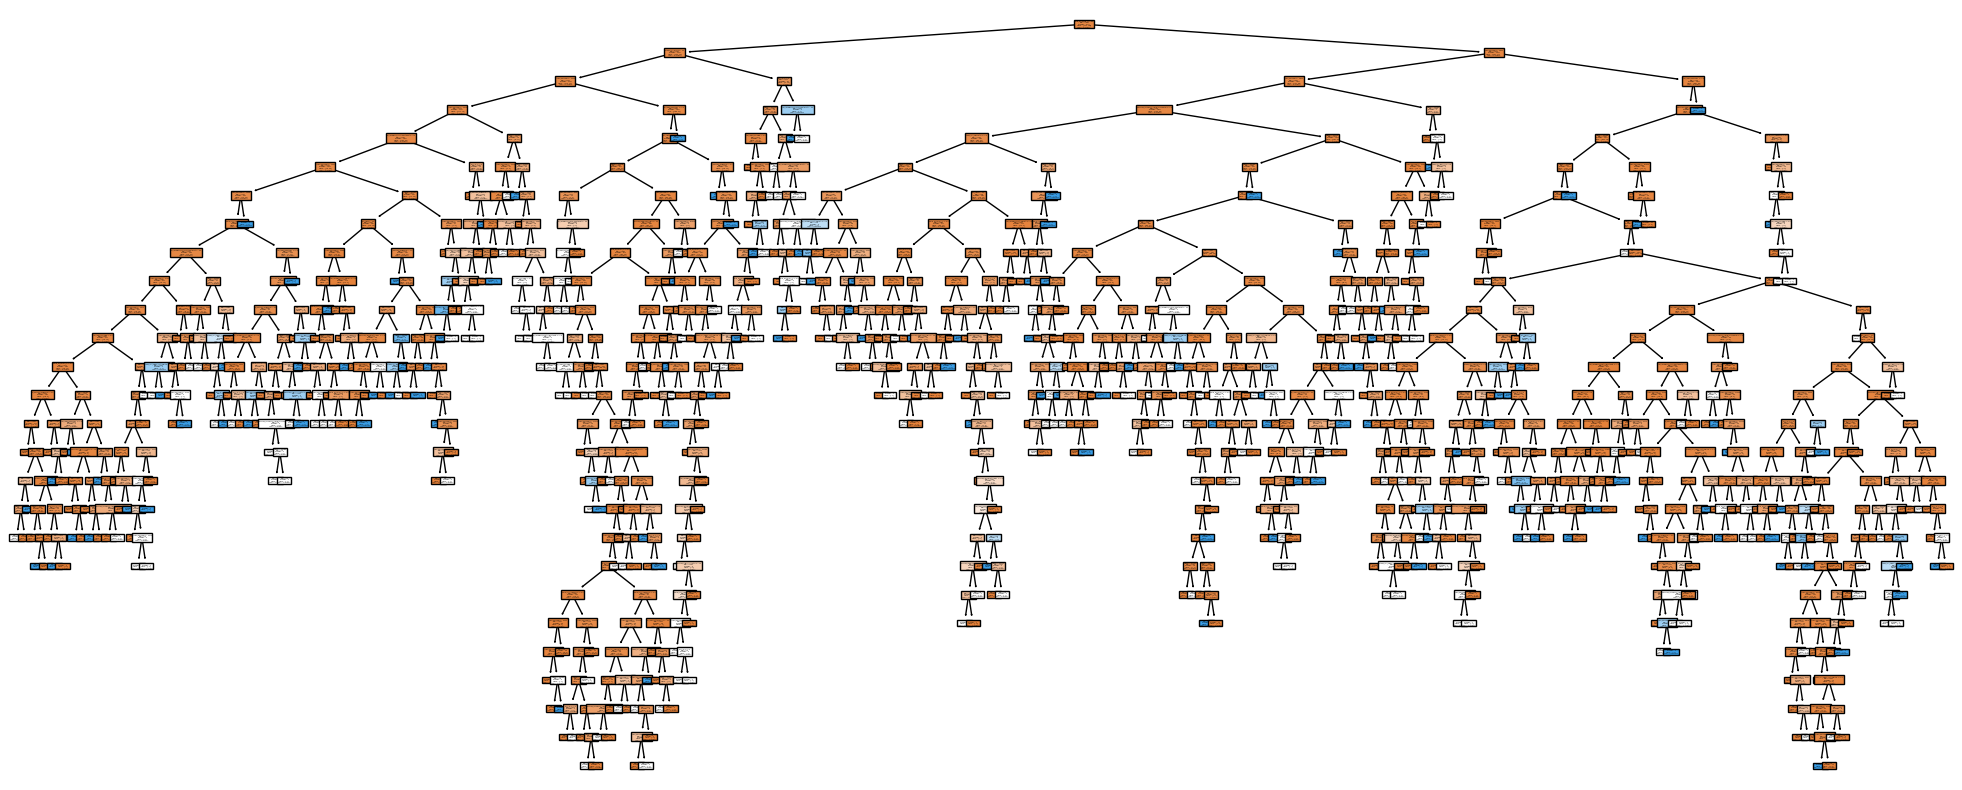

In [ ]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X.columns);

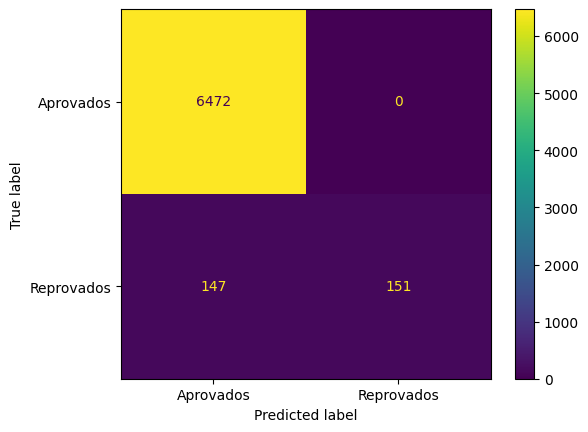

In [ ]:
#calculando a acurácia

predictions = clf.predict(X)
cm = confusion_matrix(y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [ ]:
predict = clf.predict(X)

In [ ]:
accuracy_score(y, predict)

0.9782865583456425

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_treino,y_treino)

In [ ]:
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0])

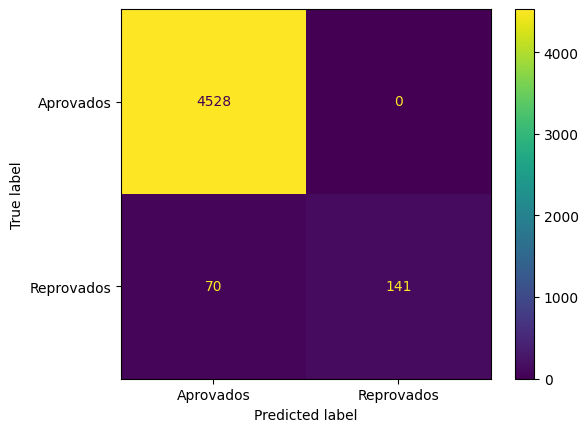

In [ ]:
predictions = clf.predict(X_treino)
cm = confusion_matrix(y_treino, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [ ]:
predict = clf.predict(X_treino)

In [ ]:
accuracy_score(y_treino, predict)

0.9852289512555391

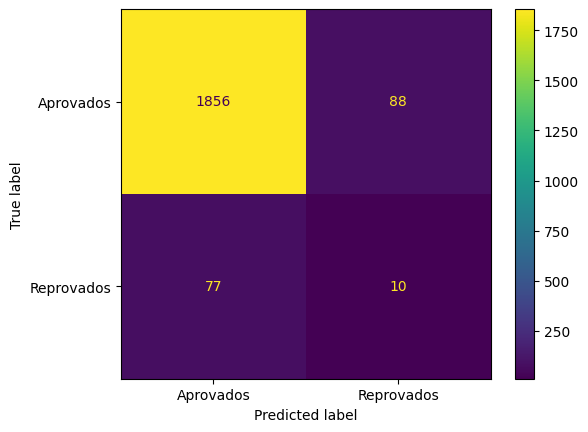

In [ ]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])
disp.plot()

In [ ]:
X_test.shape

(2031, 28)

In [ ]:
accuracy_score(y_test, y_chapeu_teste)

0.9187592319054653

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5 ,random_state=123)
clf = clf.fit(X_treino,y_treino)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9571639586410635

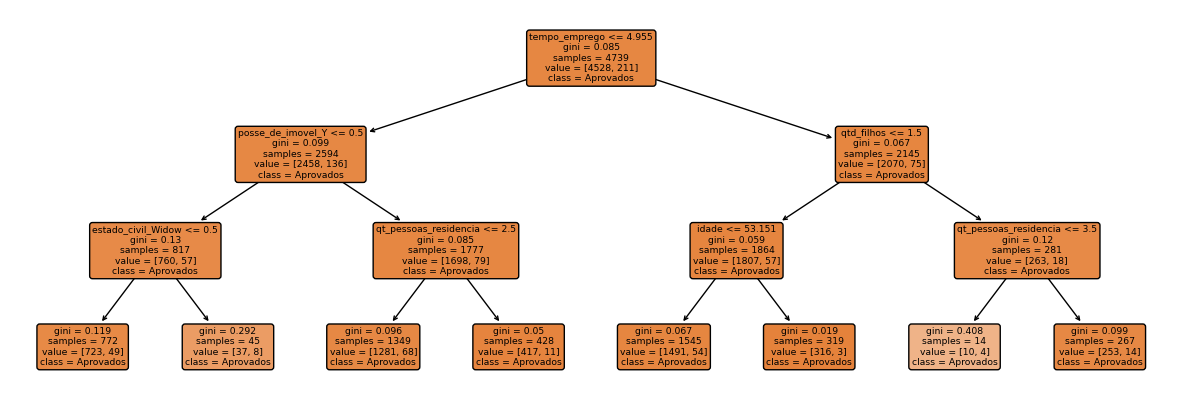

In [ ]:
plt.figure(figsize=[15,5])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=X_treino.columns);

In [ ]:
#5)

y = df.mau.replace(1,0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
accuracy_score(y_test, predict)

0.9571639586410635